/Users/smsaleeb/Downloads/PythonScripts/Plt.AeroProfiles-Shape-Profile-Aug7.png


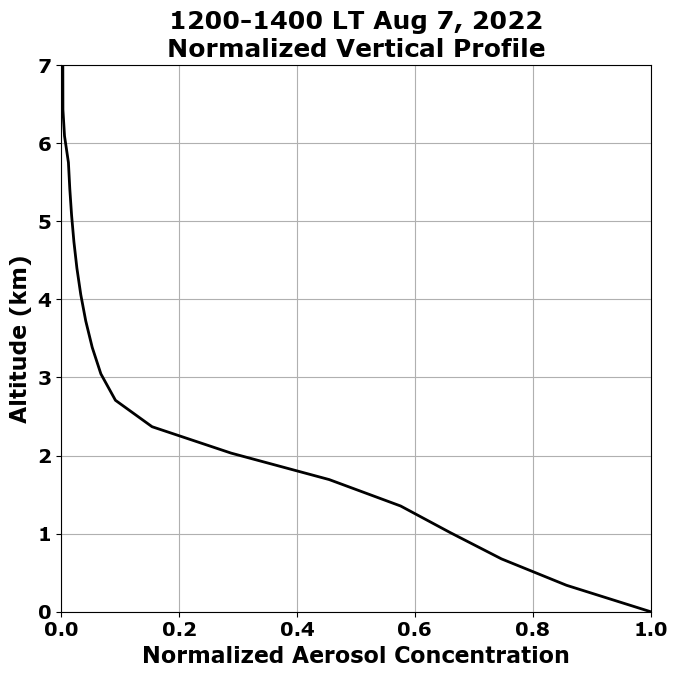


**********************************************************************************

17 June 2022 - Aerosol Profiles 
 Houston Pre-Convection 12-14 LT
                 Height     Mode-1     Mode-2    Mode-3      Total
                   km         #/mg       #/mg      #/mg       #/mg
Aerosol Profile:  0.000     2970.7      458.2       0.0     3428.8
Aerosol Profile:  0.338     2546.9      392.8       0.0     2939.7
Aerosol Profile:  0.677     2218.8      342.2       0.0     2561.0
Aerosol Profile:  1.015     1959.3      302.2       0.0     2261.4
Aerosol Profile:  1.354     1710.9      263.9       0.0     1974.8
Aerosol Profile:  1.692     1350.8      208.3       0.0     1559.1
Aerosol Profile:  2.031      857.1      132.2       0.0      989.3
Aerosol Profile:  2.369      458.2       70.7       0.0      528.9
Aerosol Profile:  2.708      273.6       42.2       0.0      315.9
Aerosol Profile:  3.046      200.2       30.9       0.0      231.0
Aerosol Profile:  3.385      156.6       24.2

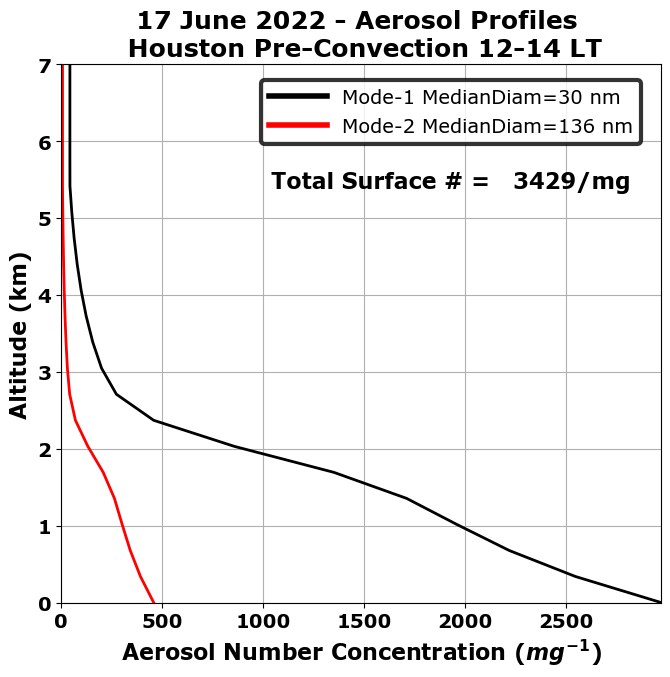


**********************************************************************************

7 Aug 2022 - Aerosol Profiles 
 Houston Pre-Convection 11-12 LT
                 Height     Mode-1     Mode-2    Mode-3      Total
                   km         #/mg       #/mg      #/mg       #/mg
Aerosol Profile:  0.000     1229.5      226.9       0.0     1456.4
Aerosol Profile:  0.338     1054.1      194.5       0.0     1248.7
Aerosol Profile:  0.677      918.3      169.5       0.0     1087.8
Aerosol Profile:  1.015      810.9      149.7       0.0      960.6
Aerosol Profile:  1.354      708.1      130.7       0.0      838.8
Aerosol Profile:  1.692      559.1      103.2       0.0      662.3
Aerosol Profile:  2.031      354.7       65.5       0.0      420.2
Aerosol Profile:  2.369      189.6       35.0       0.0      224.6
Aerosol Profile:  2.708      113.3       20.9       0.0      134.2
Aerosol Profile:  3.046       82.8       15.3       0.0       98.1
Aerosol Profile:  3.385       64.8       12.0  

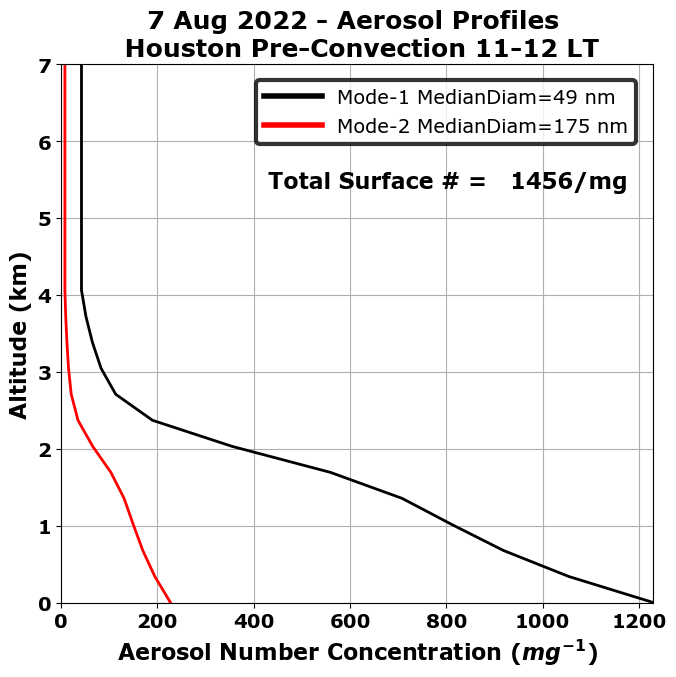


**********************************************************************************



In [1]:
###################################################################################################
# Create vertical profiles of aerosols by using observed multi-mode surface concentrations (#/cm3)
# from the AMF1 site at LaPorte (provided by Chongai Kuang and Tamanna Subba) and applying a
# vertical shape function up to ~ 6 km altitude (provided by Bo Chen and the groups at Texas A&M).
# TAMU proiles were only available for certain periods, so this script uses the shape of the 
# Aug 7, 2022 for all case days. Aerosol concentrations are in ambient #/cm3 units, so we convert
# to #/mg for modeling using an air density estimate near the surface from model initial conditions
# (from ERA-5 reanalysis) for the Aug 7, 2022 event. The air density for conversion from #/cm3 to
# #/mg was 1.159 kg/m3. Following the conversion to #/mg, the vertical shape profile was applied to
# the surface concentration up to 6 km altitude. Above that, a background concentration of X/mg
# (specified below) was applied and split across the number of aerosol modes proportioned by total number.
###################################################################################################
import math, numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
font = {'family':'verdana','size':14,'weight':'bold'}
mpl.rc('font', **font)
font_axestitle = 16
font_title     = 18
# Flag to print a table of aerosol profiles in addition to the plots
print_profile = True
# Flag to output profile plots to files
plot_to_file = False
# Minimum aerosol number concentration per mg-air (#/mg)
min_aero=50
# Max height to plot (km)
max_hgt_plot=7

# Choose which set of these profiles to plot in the list variable "plotlist" below.
# 1: June 17  - Pre-convective control profiles
# 2: August 7 - Pre-convective control profiles
plotlist = [0,1,2]
# Vertical levels (km) to compute concentration to plot
heights=np.linspace(0,22000,66)
heights=heights/1000

# Altitude vs Base state air density from Aug 07, 2022 Houston TRACER simulation setup using
# ERA5 reanalysis for initial conditions. These variables provide the model level altitudes (AGL)
# from the RAMS sigma-Z vertical coordinate and the associated initital base state density profile
# (from a sea level grid cell).

# Model scalar vertical level altitudes in meters (AGL)
altitude=np.array([\
         -24,    24,    76,   130,   186,   245,   308,   373,   442,   514,\
         590,   669,   752,   840,   932,  1028,  1130,  1236,  1348,  1466,\
        1589,  1718,  1854,  1997,  2147,  2304,  2470,  2643,  2825,  3016,\
        3217,  3428,  3650,  3882,  4126,  4383,  4652,  4935,  5230,  5531,\
        5831,  6131,  6431,  6731,  7031,  7331,  7631,  7931,  8231,  8531,\
        8831,  9131,  9431,  9731, 10031, 10331, 10631, 10931, 11231, 11531,\
       11831, 12131, 12431, 12731, 13031, 13331, 13631, 13931, 14231, 14531,\
       14831, 15131, 15431, 15731, 16031, 16331, 16631, 16931, 17231, 17531,\
       17831, 18131, 18431, 18731, 19031, 19331, 19631, 19931, 20231, 20531,\
       20831, 21131, 21431, 21731, 22031])
# Base state air density per vertical level above (kg/m3)
density=np.array([\
       1.164, 1.159, 1.154, 1.149, 1.143, 1.138, 1.132, 1.126, 1.120, 1.113,\
       1.106, 1.098, 1.090, 1.081, 1.071, 1.062, 1.052, 1.041, 1.030, 1.019,\
       1.007, 0.995, 0.982, 0.968, 0.954, 0.940, 0.924, 0.909, 0.892, 0.875,\
       0.857, 0.840, 0.821, 0.803, 0.784, 0.764, 0.744, 0.723, 0.701, 0.678,\
       0.657, 0.636, 0.616, 0.597, 0.579, 0.561, 0.544, 0.527, 0.510, 0.494,\
       0.478, 0.463, 0.448, 0.434, 0.420, 0.407, 0.393, 0.380, 0.367, 0.355,\
       0.343, 0.331, 0.319, 0.307, 0.296, 0.285, 0.273, 0.262, 0.251, 0.240,\
       0.229, 0.219, 0.209, 0.200, 0.191, 0.182, 0.173, 0.165, 0.157, 0.148,\
       0.141, 0.134, 0.127, 0.120, 0.114, 0.108, 0.102, 0.097, 0.092, 0.088,\
       0.083, 0.079, 0.075, 0.071, 0.067])

# Compute density at each output level to plot based on base state density profile
altitude = altitude/1000.
densfac = np.zeros((len(heights)),dtype='float32')
for i in range(len(heights)):
    for a in range(len(altitude)):
        if(heights[i] > altitude[a] and heights[i] < altitude[a+1]):
            awt2 = (heights[i] - altitude[a]) / (altitude[a+1]-altitude[a]) 
            awt1 = 1.0 - awt2
            densfac[i] = awt1*density[a] + awt2*density[a+1]
    #print(f'{i} {heights[i]:7.3f} {densfac[i]:7.3f}')
    
# Loop over aerosol profiles to plot
for profiles_to_plot in plotlist:

    # Set some defaults
    num_modes=0
    mode1_concen=0.
    mode2_concen=0.
    mode3_concen=0.

    if profiles_to_plot == 0:
        # Setup to plot idealized aerosol concentration vertical shape profiles
        num_modes=1
        mode1_concen=1.;  median1R = 'Idealized'; median1D = 'Idealized'
        fulltitle = f'1200-1400 LT Aug 7, 2022\nNormalized Vertical Profile'
        figname = 'Shape-Profile-Aug7'
        
    elif profiles_to_plot == 1:
        # June 17, 2022 - before convection near Houston (12:00-14:00 LT)
        num_modes=2
        mode1_concen=3443.;  median1R = '15 nm'; median1D =  '30 nm' #r = 15.0nm = 0.0150um
        mode2_concen=531.;   median2R = '68 nm'; median2D = '136 nm' #r = 68.0nm = 0.0680um
        fulltitle = f'17 June 2022 - Aerosol Profiles \n Houston Pre-Convection 12-14 LT'
        figname = 'Jun17-PreConvection'

    elif profiles_to_plot == 2:
        # August 7, 2022 - before convection near Houston (11:00-12:00 LT)
        num_modes=2
        mode1_concen=1425.;  median1R = '24.5 nm'; median1D =  '49 nm' #r = 24.5nm = 0.0245um
        mode2_concen=263.;   median2R = '87.5 nm'; median2D = '175 nm' #r = 87.5nm = 0.0875um
        fulltitle = f'7 Aug 2022 - Aerosol Profiles \n Houston Pre-Convection 11-12 LT'
        figname = 'Aug07-PreConvection'

    # Convert (#/cm3) ambient concentration to (#/mg) assuming air density of first
    # level above ground from input above. Model uses #/mg mixing ratio concentration.
    if profiles_to_plot > 0:
        mode1_concen = mode1_concen / density[1]
        mode2_concen = mode2_concen / density[1]
        mode3_concen = mode3_concen / density[1]
    
    # Set some label and axis info based on what is computed
    if profiles_to_plot == 0:
        plotlabel='Normalized Aerosol Concentration'
    elif profiles_to_plot > 0:
        plotlabel='Aerosol Number Concentration ($mg^{-1}$)'
    
    # Set up profile and plot if we have the data
    if num_modes > 0:

        # Compute total aerosol number and get relative number fractions of each mode
        totaerosol = mode1_concen + mode2_concen + mode3_concen
        m1_frac = mode1_concen / totaerosol
        m2_frac = mode2_concen / totaerosol
        m3_frac = mode3_concen / totaerosol

        # Profile shape function from Bo Chen (Texas A&M).
        # All parameters are equal or larger than 0.0.
        # This profile shape is associated with aerosol data on Aug 7, 2022
        # at the ARM AMF1 Laporte site from 1715-1745 UTC. 
        x0=4.85856762 # a parameter for the exponential function
        gam=0.75814697 # a parameter for the exponential function
        xerf=1.40855631
        rm=1.94524093 # boundary layer height
        s=0.51943654 # linked to thickness of entrainment zone
        xc=1.44155834
        profile_aug7=np.zeros((len(heights)),dtype='float32')
        xferi=0
        for i in range(len(heights)):
            profile_aug7[i]=(x0*math.exp(-gam*heights[i]))-(xerf*math.erf((heights[i]-rm)/s))+xc
            if heights[i] > 6.0: # For altitudes > 6 km AGL
                if(xferi==0):xferi=i
                profile_aug7[i] = profile_aug7[xferi] * np.exp(-heights[i]/10.0)
            #print(f'General Aerosol Profile (#/cm3): {heights[i]:6.3f}  {profile_aug7[i]:7.2f}')
        maxvalueinprofile=np.max(profile_aug7)
        # Shape profile scaled from 0 -> 1 via max normalized backscatter
        profile_aug7=profile_aug7/maxvalueinprofile

        # Set the profiles relative to the total aerosol surface concentration
        profile1 = profile_aug7 * mode1_concen
        profile2 = profile_aug7 * mode2_concen
        profile3 = profile_aug7 * mode3_concen

        # Compute the relative concenration ratios among aerosol modes
        totalmaxt = mode1_concen + mode2_concen + mode3_concen
        aerorat1 = mode1_concen / totalmaxt
        aerorat2 = mode2_concen / totalmaxt
        aerorat3 = mode3_concen / totalmaxt

        # Constrain upper level concentrations to a minimum / maximum of X/mg-air using
        # ratios of the separate modes.
        if profiles_to_plot > 0:
            for i in range(len(heights)):
                if profile1[i] < aerorat1 * min_aero: profile1[i] = aerorat1 * min_aero
                if profile2[i] < aerorat2 * min_aero: profile2[i] = aerorat2 * min_aero
                if profile3[i] < aerorat3 * min_aero: profile3[i] = aerorat3 * min_aero
                if heights[i] > 6.0: 
                    profile1[i] = aerorat1 * min_aero
                    profile2[i] = aerorat2 * min_aero
                    profile3[i] = aerorat3 * min_aero

        profiletotal=profile1+profile2+profile3

        # Print some output data to a table to view
        if print_profile and profiles_to_plot > 0:
            print(f'{fulltitle}')
            print(f'                 Height     Mode-1     Mode-2    Mode-3      Total')
            print(f'                   km         #/mg       #/mg      #/mg       #/mg')
            for i in range(len(heights)):
                print(f'Aerosol Profile: {heights[i]:6.3f}  {profile1[i]:9.1f}  {profile2[i]:9.1f}'\
                     f' {profile3[i]:9.1f}  {profiletotal[i]:9.1f}')

        ###########################################################################################
        # Set up the figure and axes
        maxvalueinprofile=max(mode1_concen,mode2_concen,mode3_concen)
        fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,7))
        ax.set_xlabel(f'{plotlabel}',fontsize=font_axestitle,fontweight='bold')
        ax.set_ylabel('Altitude (km)',fontsize=font_axestitle,fontweight='bold')
        ax.set_ylim(ymin=0.0)
        ax.yaxis.set_ticks(np.arange(0,max_hgt_plot+1,1))
        ax.grid()
        ax.set_xlim(xmin=0.0,xmax=maxvalueinprofile)
        if mode1_concen > 0.0:
            ax.plot(profile1,heights,color='black',linestyle='solid',linewidth=2,\
                    label=f'Mode-1 MedianDiam={median1D}')
        if mode2_concen > 0.0:
            ax.plot(profile2,heights,color='red',linestyle='solid',linewidth=2,\
                    label=f'Mode-2 MedianDiam={median2D}')
        if mode3_concen > 0.0:
            ax.plot(profile3,heights,color='blue',linestyle='solid',linewidth=2,\
                    label=f'Mode-3 MedianDiam={median3D}')
        ax.set_title(fulltitle, fontsize=font_title, fontweight='bold')

        # Set up the legend and annotations
        if profiles_to_plot > 0:
            legend_properties = {'weight':'normal','size'   : 14}
            leg = ax.legend(bbox_to_anchor=(0.15,0.86, 1,0.102),loc='center',ncol=1,\
                                    prop=legend_properties,handlelength=3.0)
            leg.get_frame().set_edgecolor('black')
            leg.get_frame().set_linewidth(3)
            for line in leg.get_lines():
                line.set_linewidth(4.0)
            plt.text(0.35,0.77,f'Total Surface # = {totalmaxt:6.0f}/mg',transform=ax.transAxes,
                    color='black',fontsize=16)

        # Set background layout and color
        fig.tight_layout()
        fig.patch.set_facecolor('white')

        # Save the plots to a file
        plotn=f'/Users/smsaleeb/Downloads/PythonScripts/Plt.AeroProfiles-{figname}.png'
        print(plotn)
        if plot_to_file:
            fig.savefig(plotn,bbox_inches='tight',pad_inches=0.1,dpi=200)
        plt.show()
        print()
        print('**********************************************************************************')
        print()